## 1. Import necessary libraries

In [23]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARMA, ARIMA

import itertools

## 2. Data collection

In [24]:
df = pd.read_excel(r'C:\Users\sawaled\Desktop\Personal\data\Assignement_18_Forecasting\CocaCola_Sales_Rawdata.xlsx',)
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [25]:
df['Q'] = 0
df['year'] = 0
for i in range(42):
    p=df['Quarter'][i]
    df['Q'][i]=p[0:2]
    df['year'][i]=p[3:]
    
df.head()

,Quarter,Sales,Q,year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


#### ========================================================================================================

## 3. Data Understanding, Visulalization and Preaparation 

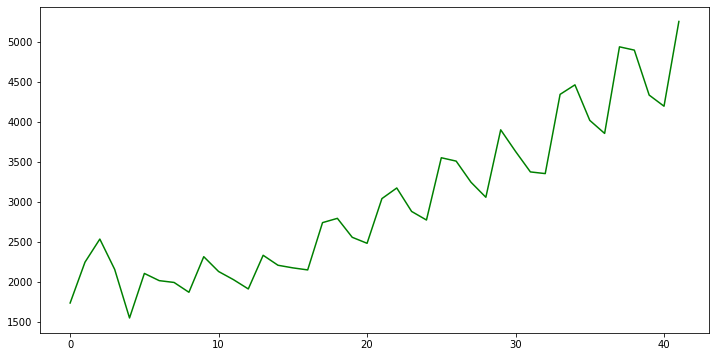

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df.Sales, color='green')
plt.show()

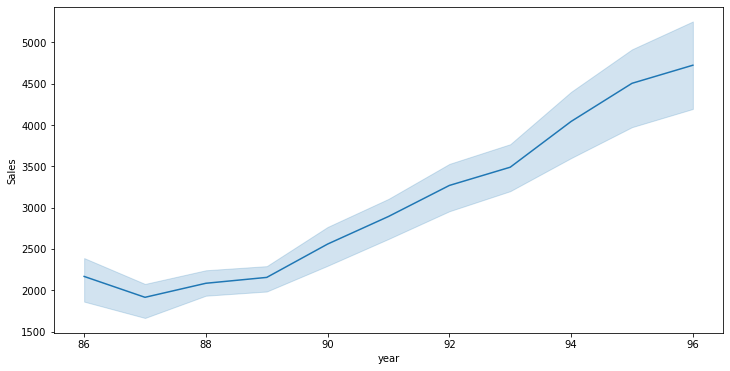

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='Sales', data=df)
plt.show()

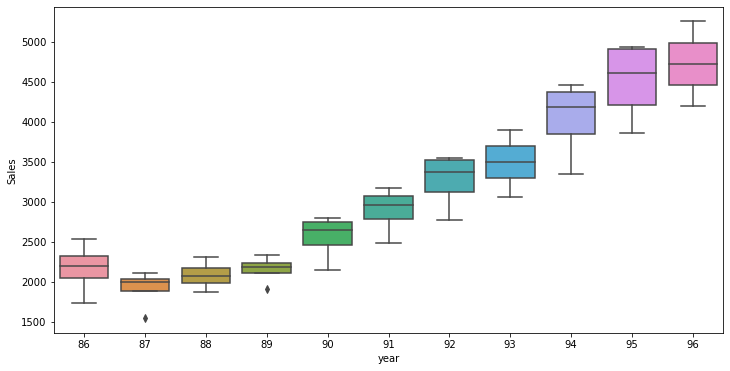

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x= 'year', y='Sales', data=df)
plt.show()

## 3.1 ACF and PACF plot

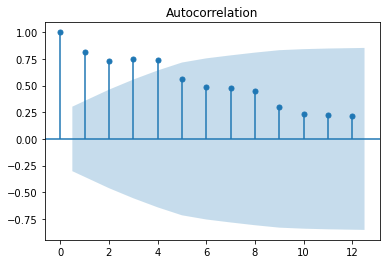

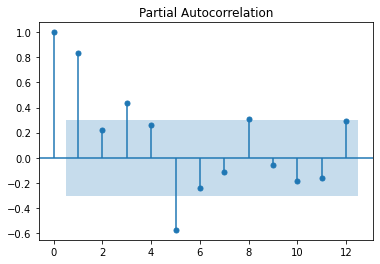

In [29]:
plot_acf(x= df['Sales'], lags=12)
plot_pacf(x= df['Sales'], lags=12)
plt.show()

## 4. Model building

In [30]:
df.shape

(42, 4)

In [31]:
train = df.head(32)
test  = df.tail(10)

## 5. ARIMA model

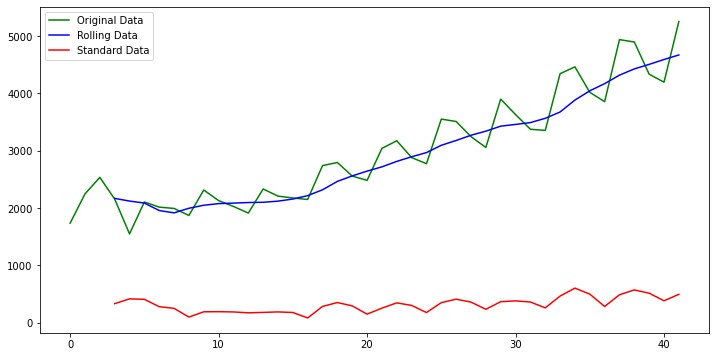

In [32]:
# Checking whether the input data is stationry or no

df_roll = df['Sales'].rolling(window=4).mean()
df_std = df['Sales'].rolling(window=4).std()

plt.figure(figsize=(12,6))

input_data = plt.plot(df['Sales'],label= 'Original Data', color='g')
rolling = plt.plot(df_roll,label= 'Rolling Data', color='b')
std = plt.plot(df_std,label= 'Standard Data', color='r')
plt.legend(loc='best')
plt.show()

In [33]:
result = adfuller(df.Sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.309421
p-value: 0.996661


In [34]:
# Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation 
# plot looks like.

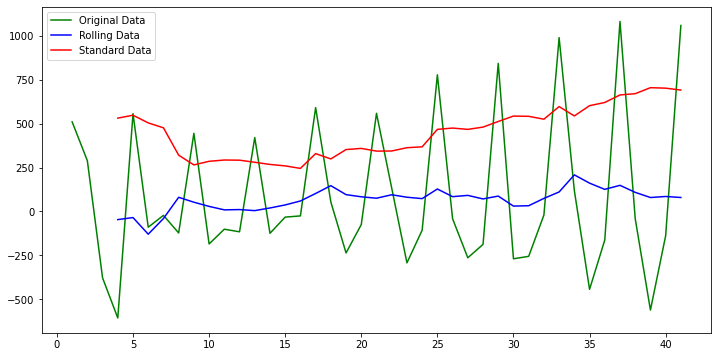

In [35]:
df_sales_lagged = df['Sales'].diff()
df_roll_lagged = df_sales_lagged.rolling(window=4).mean()
df_std_lagged = df_sales_lagged.rolling(window=4).std()

plt.figure(figsize=(12,6))

input_data = plt.plot(df_sales_lagged,label= 'Original Data', color='g')
rolling = plt.plot(df_roll_lagged,label= 'Rolling Data', color='b')
std = plt.plot(df_std_lagged,label= 'Standard Data', color='r')
plt.legend(loc='best')
plt.show()

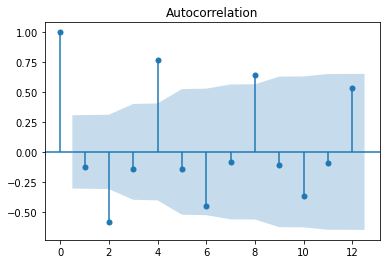

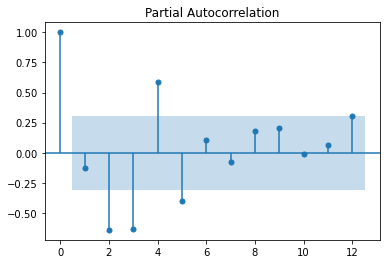

In [36]:
# Plotting ACF and PACF for lagged values

plot_acf(df['Sales'].diff().dropna() , lags=12)
plot_pacf(df['Sales'].diff().dropna(), lags=12)
plt.show()

In [37]:
p = range(0,5)
d = range(0,1)
q = range(0,5)

pdq = list(itertools.product(p,d,q))

In [38]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4)]

In [39]:
for param in pdq:
    try:
        ARIMA_model = ARIMA(train['Sales'], order=param)
        ARIMA_model_fit = ARIMA_model.fit()
        print(param, ARIMA_model_fit.aic)
    except:            
        continue

(0, 0, 0) 504.8634244592431
(0, 0, 1) 488.2943465298915
(0, 0, 2) 468.9081020119421
(0, 0, 3) 470.88425077173315
(0, 0, 4) 466.33624588844873
(1, 0, 0) 472.5800372242106
(1, 0, 1) 471.6159732850941
(1, 0, 2) 690.9701913684395
(1, 0, 3) 467.48570463485396
(1, 0, 4) 452.7771859703671
(2, 0, 0) 474.3647780756329
(2, 0, 1) 473.21549843552634
(2, 0, 2) 481.3541989021512
(2, 0, 3) 465.2312350003923
(2, 0, 4) 454.633553468208
(3, 0, 0) 467.23861582961104
(4, 0, 0) 461.2701956865734


In [40]:
ARIMA_final = ARIMA(train['Sales'], order=(1, 0, 4))
ARIMA_final_fit = ARIMA_final.fit(disp=0)

In [41]:
forecast = ARIMA_final_fit.forecast(steps=10)[0]

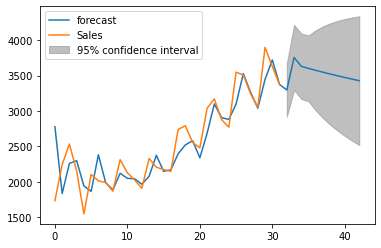

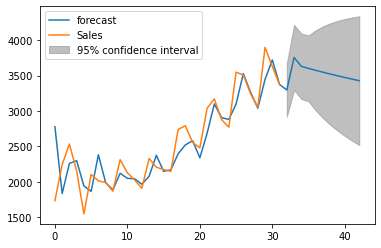

In [42]:
ARIMA_final_fit.plot_predict(0,42)

In [43]:
def RMSE(act,pred):
    MSE = np.mean((act-pred)**2)
    return np.sqrt(MSE)

In [44]:
RMSE(test['Sales'], forecast)

977.3365471811384

#### ========================================================================================================